In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
import statsmodels.api as sm
import quandl


**QUESTION 1**

C:\Users\Ange\AppData\Roaming\Python\Python311\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: Monthly!$A:$F.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
C:\Users\Ange\AppData\Local\Temp\ipykernel_23656\617297070.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FTSE100_df['Date'] = pd.to_datetime(FTSE100_df['Date'].copy(), format ='%m/%d/%Y')      # formating the datetime


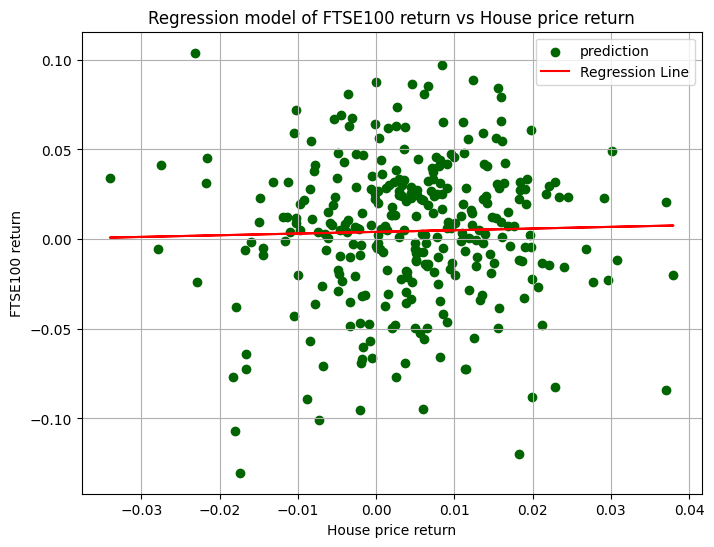

The Correlation Coefficient is 0.026551295701909956
The Null hypothesis is significant there is no relationship between House price and FTSE100 at p value = 0.6409049000031647


In [2]:
"""By using two dataset Monthly house price and FTSE100 for given period studying the correlation between them
   and making scatter plot with regression line and then perform hypothesis test"""
House_price_df = pd.read_excel('Monthly.xlsx')                          # Reading Monthly excel dataset
House_df_extract = House_price_df[['Unnamed: 0','Average House Price']] # retrieving the column of Unnamed containg dates and Average house price data
House_df = House_df_extract.set_index('Unnamed: 0')                     # Setting unnamed column as index
House_df = House_df['1991-01-01':'2016-12-31']
House_df['Price Return'] = House_df['Average House Price'].pct_change()     # determining Monthly return on Average House Price
House_df_return = House_df['Price Return'].dropna()                        # Droping NaN value in Monthly return column

#Loading FTSE100 data to find the Adj return
FTSE_df = pd.read_csv('FTSE100.csv')

#Exctracting the dataset of FTSE100 
FTSE100_df = FTSE_df[['Date', 'Adj Close']]
FTSE100_df['Date'] = pd.to_datetime(FTSE100_df['Date'].copy(), format ='%m/%d/%Y')      # formating the datetime 
FTSE100_df.set_index('Date', inplace = True)                                        # setting Date column as index
FTSE100_df_sorted = FTSE100_df.sort_values('Date')                                     # sorting date in ascending order
FTSE100_df_sorted['Adj Return'] = FTSE100_df_sorted['Adj Close'].pct_change()         # Determining Adj Close return of  FTSE100 index
FTSE100_df_return = FTSE100_df_sorted['Adj Return'].dropna()                          # Removing NaN value from return column
X = House_df_return
Y = FTSE100_df_return
#Plotting monthly return of FTSE100 index and Average house price with regression line
plt.figure(figsize =(8,6))
plt.scatter(X,Y, c = 'darkgreen', label = 'prediction')
slope, intercept,r, p, se =stats.linregress(X, Y)               # slope intercept, correlation coefficient, p value, standard error 
Regression = slope * X + intercept                              # Regression line formular
plt.plot(X, Regression, c = 'r', label = 'Regression Line') 
plt.xlabel('House price return')
plt.ylabel('FTSE100 return')
plt.legend(loc ='upper right')
plt.title('Regression model of FTSE100 return vs House price return')
plt.grid()
plt.show()
# printing Correlation coefficient calculated using scipy library as  r
print(f'The Correlation Coefficient is {r}')        
if p>0.05:                              # comparing with significancy value 0.05 which is alpha
    print('The Null hypothesis is significant there is no relationship between House price and FTSE100 at p value =', p)
else:
    print('Null hypothesis is rejected means there is significant relationship between House price and FTSE100 at p value =\n', p)


**QUESTION 2**

In [3]:
"""Given US college and university dataset containg information and using choosen column
   to perform different task"""
Colleges_df = pd.read_csv('College.csv')     # Retrieving the college dataset

**Q2.a)**

In [4]:
#a) Finding Correlation coefficient for multiple variable in Colleges dataset
correlation_coefficients = Colleges_df[['Apps','Enroll','Outstate', 'Top10perc', 'Top25perc']].corr()  # from college dataframe finding correlation coefficient on multiple column instructed
print('The Correlation coefficient for multiple variables in College dataset')                         # returning the correlation coefficient calculated
correlation_coefficients

The Correlation coefficient for multiple variables in College dataset


,Apps,Enroll,Outstate,Top10perc,Top25perc
Apps,1.000000,0.846822,0.050159,0.338834,0.351640
Enroll,0.846822,1.000000,-0.155477,0.181294,0.226745
Outstate,0.050159,-0.155477,1.000000,0.562331,0.489394
Top10perc,0.338834,0.181294,0.562331,1.000000,0.891995
Top25perc,0.351640,0.226745,0.489394,0.891995,1.000000


**Q2.b)**

The best Feature 	 Outstate
The best Feature 	 Top25perc

                             OLS Regression Results                            
Dep. Variable:              Grad.Rate   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     235.0
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.82e-80
Time:                        23:10:31   Log-Likelihood:                -3127.2
No. Observations:                 777   AIC:                             6260.
Df Residuals:                     774   BIC:                             6274.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

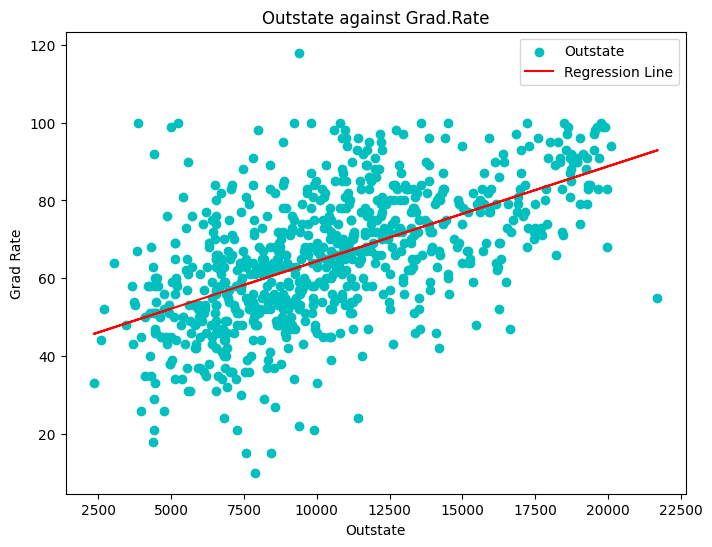

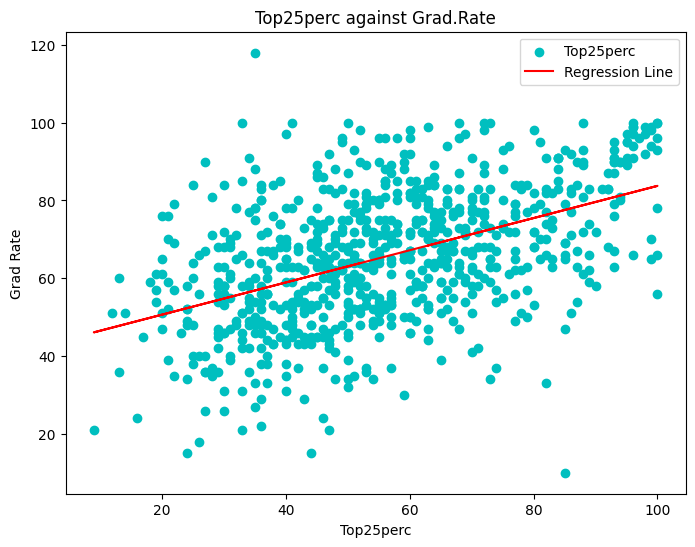

In [5]:
""" By using Stepwise to Build Linear regression model"""

Independent_v = Colleges_df[['Apps', 'Enroll','Outstate','Top10perc','Top25perc']]      # Declaring Independent Variable
Dependent_v = Colleges_df['Grad.Rate']                              # Declaring Dependent Variable

def forward_regression(Independent_v, Dependent_v, Alpha, verbose = False):                    # defining forward stepwise function with different parameter 
    predictor = []                          # initializing variable to store the selected features
    while True:                               # lopping using while
        changes = False                        
        Eliminate = list(set(Independent_v.columns) - set(predictor))  # creating the list of column which have not been selected
        gen_p = pd.Series(index = Eliminate)
        
        for New_column in Eliminate:                # Iterating to all feature that has been eliminated
            Model = sm.OLS(Dependent_v, sm.add_constant(pd.DataFrame(Independent_v[predictor + [New_column]]))).fit()          # fitting linear regression model
            gen_p[New_column] = Model.pvalues[New_column]     # storing the best fit       
            
        best_P_value = gen_p.min()                       # checking the fitted feature the minimum of them 
        
        if best_P_value < Alpha:                        # Checking if the p value is less that significance value
            best_feature = gen_p.idxmin()                    # declare the varible to loads the feature with low p value
            predictor.append(best_feature)                    # Increment  the predicted best feature to the best fit varible
            changes = True
            if verbose:
                print('The best Feature \t',best_feature, )
            
        if not changes:
            break
            
    model = sm.OLS(Dependent_v, sm.add_constant(Independent_v[predictor])).fit()    # creating linear regression model and fit the model
    return model

Model = forward_regression(Independent_v, Dependent_v, 0.05, verbose = True)     # calling the function with variables declared 
print('\n',Model.summary())                                   # printing the summary of the work
#scatter plot the best fit with regression line
for feature in Model.model.exog_names[1:]:
    plt.figure(figsize=(8,6))  # Create a new figure for each feature
    plt.scatter(Independent_v[feature], Dependent_v, c='c', label=feature)
    slope, intercept = np.polyfit(Independent_v[feature], Dependent_v, 1)
    Regression = slope * Independent_v[feature] + intercept
    plt.plot(Independent_v[feature], Regression, c='r',label = 'Regression Line' )
    plt.title(f'{feature} against Grad.Rate')
    plt.xlabel(feature)
    plt.ylabel('Grad Rate')
    plt.legend()
    plt.show()

            

**Q2.d)**

In [6]:
# D) 
"""By using the declared variables in subquestion b to perform to select the models """
Bic_Model = linear_model.LassoLarsIC(criterion = 'bic')              # Initializing function to select the model               
Bic_Model.fit(Independent_v, Dependent_v)                            # Selecting the best feature based on Bic criteria
Coefficient = Bic_Model.coef_                                        # returning the coefficient of the best fit selelected                             
Selected_variables = Independent_v.columns[Coefficient !=0]           # Extracting the coefficient of selected features
feature =pd.DataFrame({                                               # Creating dataframe of the best fit selected and their corresponding coefficient
    'Variables': Selected_variables,
    'Coefficient': Coefficient[Coefficient !=0]
}) 
print('Using BIC to find the best fit model\n')                        
#print(feature.to_string(index = False))                                # returning the best fit
display(feature)

Using BIC to find the best fit model



,Variables,Coefficient
0,Apps,0.000828
1,Enroll,-0.002936
2,Outstate,0.001862
3,Top25perc,0.179221


**Q2.e)**

In [7]:
"""Calculating the accuracy of the model using BIC model and Stepwise model using only useful variable.
    here i choose R-squared metric to determine the accuracy of the selected feature and determining
     the accuracy using all five predictor"""
y_pred = Model.predict(sm.add_constant(Independent_v[Model.model.exog_names[1:]]))        # function to predict dependent variable based fitted model in stepwise regression 
r_2 = r2_score(Dependent_v, y_pred)                        # using the R-squared function to calculate the R2 between dependent variable and predicted variable
print('For Stepwise R_Squared:',r_2)                      # Return the calcualated R-squared

#Using BIC model to predict the accuracy
Selected_x = Independent_v[Selected_variables]                # creating new dataframe containing the selected features
Bic_Model.fit(Selected_x, Dependent_v)                        #  fitting the relationship between selected feature and dependent variable
Bic_y_pred = Bic_Model.predict(Selected_x)                     
Bic_r2 = r2_score(Dependent_v, Bic_y_pred)                     # calculating the R-squared
print('For BIC R_Squared:', Bic_r2)


Model_all = LinearRegression()                                 # Initializing linear regression model and assign it to the variable
Model_all.fit(Independent_v, Dependent_v)                      # train the model to understand all predictor and target variable
All_y_pred = Model_all.predict(Independent_v)                   # using the trained modelto make prediction for the dependent variable 
Accuracy_r2 = r2_score(Dependent_v, All_y_pred)                 # Calcualating the R-squared metric
print('For all feature R_square:', Accuracy_r2)                   # return the calculated R-squared


For Stepwise R_Squared: 0.37776441749868717
For BIC R_Squared: 0.3856960170430921
For all feature R_square: 0.3861582005130556


**Q2.f)**

In [8]:
"""Predicting Graduation rate for Carnegie Mellon University by using 
        the Model that has provided high degree of accuracy"""

CMU_data = Colleges_df[Colleges_df['Unnamed: 0'] == 'Carnegie Mellon University']                # Create variable to store data of Carnegie Mellon University row
# CMU_data = CMU_data.to_string(index = False)
#CMU_data = CMU_data.reset_index(drop=True)  # Reset the index without converting to a string
CMU_Grad_rate = CMU_data['Grad.Rate'].iloc[0]
CMU_Pred = CMU_data[['Apps', 'Enroll','Outstate', 'Top10perc', 'Top25perc']]                     # creating dataframe of CMU data
pred_graduation = Model_all.predict(CMU_Pred)                                                     # by using All predictor model to predict CMU graduation rate
print('\nThe predicted CMU graduation rate is', pred_graduation[0])



The predicted CMU graduation rate is 89.20112305346854


**QUESTION 3**


The Estimated Road traffic Death in 2021:  1.8824060150376454
The average error is:10.099868014612701
The Coefficient of Correlation: 0.9170087408524145


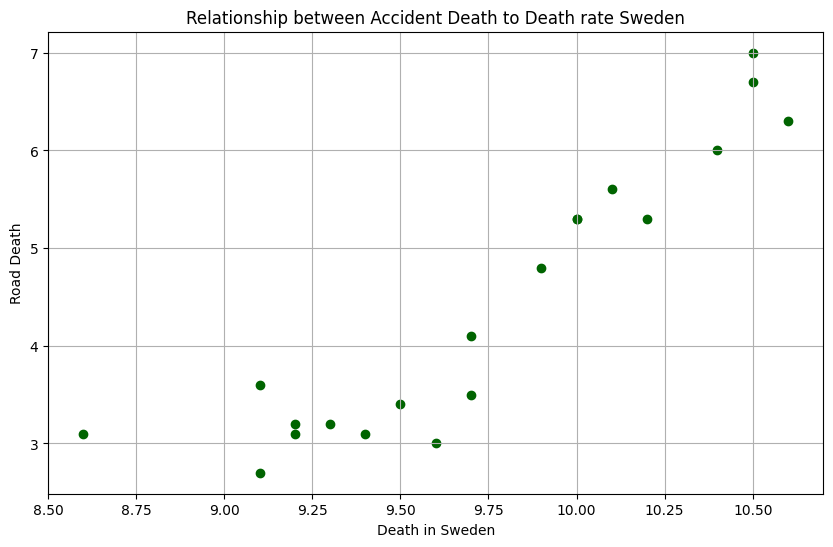

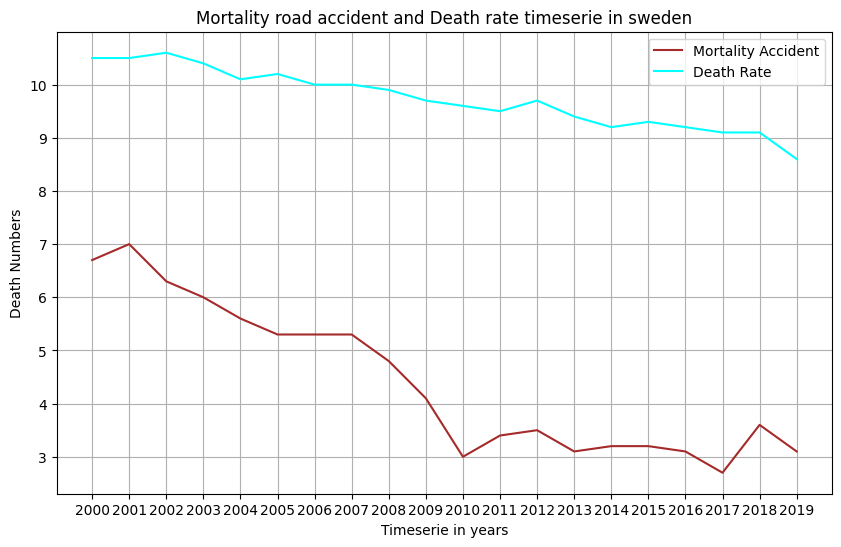

Null hypothesis is rejected means there is significant relationship between Mortality caused by road accident and Death rate p-value =0.000000005


In [9]:
"""The Study in domain of transport and predicting the situation in 2021, I have used the data of sweden about 
    Mortality caused road traffic injury(per 100,000 population and Death rate, crude(per 1,000 people)
     to analyze their relatioship and their impact)"""
Road_df = pd.read_excel('API_SH.STA.TRAF.P5_DS2_en_excel_v2_5875472.xlsx',sheet_name = 'Data', skiprows = 3)     # Extracting the dataset of Mortality caused by road accident 
Country_df = Road_df[Road_df['Country Name'].isin(['Sweden'])]           # Checking  and accessing the row sweden in column of country name         
years = [str(year) for year in range(2000, 2020)]                        # defining the range of years which contain values from 2000 to 2019
result_df = Country_df[years]                                            # return the data of sweden and corresponding years                                      
Death_road =  result_df.melt(var_name = 'Date', value_name = 'Death Accident')   # Reshaping data and naming of the column 

# Considering Death rate, crude(per 1000 people) in Sweden
Death_rate = pd.read_excel('API_SP.DYN.CDRT.IN_DS2_en_excel_v2_5872633.xlsx', sheet_name = 'Data', skiprows = 3 )     # Extracting the dataset of Death rate, crude in different years
Selected = Death_rate[Death_rate['Country Name'].isin(['Sweden'])]            #Accessing the row containing sweden data
death_df =  Selected[years]                                                    # from the dataframe returning the data from only sweden and years 
Death_Rate =  death_df.melt(var_name = 'Date', value_name = 'Death Rate')       # Naming and reshiping data for sweden   

Data_Merge = pd.merge(Death_road, Death_Rate, on = 'Date')                      # Merging two data set based on date column
Independent_x = Data_Merge['Date']                                               # Declaring independent variable(predictor) which is data column
Dependent_y = Data_Merge['Death Accident']                                       # Declare the dependent vatiable(predict)
model = LinearRegression()                                                       # Creating linear regression model
model.fit(Independent_x.values.reshape(-1,1) , Dependent_y)                      # training the model to assess the best fit
pred_year = 2021                                                                 # Declaring the year to predict its value
predicted_death_2021 = model.predict(np.array([[pred_year]]).reshape(-1,1))       # predicting the mortality rate in 2021
Pred_Y = model.predict(Independent_x.values.reshape(-1,1))                      # Train model to predict based on Predictor which is date
Difference = np.abs(Dependent_y - Pred_Y )                                      #  Determining the difference between predicted variable and actual dependent variable
Average_error = np.mean( Difference / Pred_Y)*100                               # By using NumPy to find the average error 
print('\nThe Estimated Road traffic Death in 2021: ', predicted_death_2021[0])     # Returning the Estimated Mortality caused by accident in 2021
print(f'The average error is:{Average_error}')                                  # Returning the Mean Absolute percentage error
Correlation = Data_Merge['Death Accident'].corr(Data_Merge['Death Rate'])        # Determing the correlation coefficient between mortality cause by road accident and death rate in sweden                
print('The Coefficient of Correlation:', Correlation)                             # returning the Correlation coefficient

# Plotting the relationship between Death due to accident and Death rate Case Study Sweden
plt.figure(figsize = (10,6))
plt.scatter(Data_Merge['Death Rate'], Data_Merge['Death Accident'], c='darkgreen')
plt.xlabel('Death in Sweden')
plt.ylabel('Road Death')
plt.title('Relationship between Accident Death to Death rate Sweden')
plt.grid()
plt.show
# Plotting the timeserie graph of bothe Mortality caused by road injury and death rate
plt.figure(figsize = (10,6))
plt.plot(Data_Merge['Date'], Data_Merge['Death Accident'], c = 'brown', label =  'Mortality Accident')
plt.plot(Data_Merge['Date'], Data_Merge['Death Rate'], c = 'cyan', label = 'Death Rate')
plt.xlabel('Timeserie in years')
plt.ylabel('Death Numbers')
plt.title('Mortality road accident and Death rate timeserie in sweden')
plt.legend()
plt.grid()
plt.show()

# Performing Hypothesis test to test wether there is relationship between two Variables
independent_x = Independent_x.to_numpy().astype(float)
dependent_y = Dependent_y.to_numpy().astype(float)

slope, intercept, r_value, p_value, std_err = stats.linregress(independent_x, dependent_y)
alpha = 0.05
if p_value > alpha:                              # comparing with significancy value 0.05 which is alpha
    print(f'The Null hypothesis is significant there is no relationship between Mortality caused by road accident and Death rate p-value= {p_value:.9f}')
else:
    print(f'Null hypothesis is rejected means there is significant relationship between Mortality caused by road accident and Death rate p-value ={p_value:.9f}')


**QUESTION 4**

In [10]:
"""By using Dataset from Quandl about unemployment rate(per 100 Israeli workforces
   from Dec 1980 to Sep 2013 task is to estimate or predict the unemployment in year 2020
            in the process below i used linear regression for estimation)"""

quandl.ApiConfig.api_key = 'DkzaLxD779kf7nmfYaHj'           #Using my Quandl key to access dataset direct
Unemployee_df = quandl.get('ODA/ISR_LUR')                   # Passing the unique code of unemployment to extract dataset
Unemployee_df = Unemployee_df['1980-12-31':'2013-09-02']    #Extract data in the period requested
x_variable = Unemployee_df.index.year.values.reshape(-1,1)  # Declaring the independent variable which is year as index and reshape it 
y_variable = Unemployee_df['Value']                         # dependent Variable which is unemployment rate

Model_ = LinearRegression()                                  # Declaring instance of linear regression 
Model_.fit(x_variable, y_variable)                           # Training linear regression model to fit the relation between dependent and independent variable

predict_year_2020 = 2020                                    # Declaring the year to predict its unemployement rate
Estim_Unemploy_2020 = Model_.predict([[predict_year_2020]])[0]
predict_v = Model_.predict(x_variable)                       # Predicting on all dependent variable in all years
Abs_difference = abs(y_variable - predict_v)
MAPE_unemploy = np.mean(Abs_difference / y_variable)*100 
print(f'\nThe Estimated Unemployment rate in 2020: ',Estim_Unemploy_2020)
print(f'The mean error in percentage:{MAPE_unemploy}%')



The Estimated Unemployment rate in 2020:  12.078546345811048
The mean error in percentage:21.99260154027202%
